# Naive Baye Classification
#### Rick Gosalvez, 2021 Data Mining

# Theory

## 1. Binary Table (3 inputs | 1 output)

In [1]:
import pandas as pd

data = {'a':[1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0],
        'b':[0,1,1,1,1,0,0,0,1,1,1,1,0,1,0,0],
        'c':[1,1,1,0,1,0,0,1,1,0,1,0,1,1,0,1],
        'K':[1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0]}

df = pd.DataFrame(data)

Expand table to evaluate combinations.

In [2]:
df['a_1_K_0']   = (df['a'] == 1) & (df['K'] == 0)
df["a_1_K_0"]   = df["a_1_K_0"].astype(int)
df['b_1_K_0']   = (df['b'] == 1) & (df['K'] == 0)
df["b_1_K_0"]   = df["b_1_K_0"].astype(int)
df['c_1_K_0']   = (df['c'] == 1) & (df['K'] == 0)
df["c_1_K_0"]   = df["c_1_K_0"].astype(int)
df['a_1_K_1']   = (df['a'] == 1) & (df['K'] == 1)
df["a_1_K_1"]   = df["a_1_K_1"].astype(int)
df['b_1_K_1']   = (df['b'] == 1) & (df['K'] == 1)
df["b_1_K_1"]   = df["b_1_K_1"].astype(int)
df['c_1_K_1']   = (df['c'] == 1) & (df['K'] == 1)
df["c_1_K_1"]   = df["c_1_K_1"].astype(int)

df['a_0_K_0']   = (df['a'] == 0) & (df['K'] == 0)
df["a_0_K_0"]   = df["a_0_K_0"].astype(int)
df['b_0_K_0']   = (df['b'] == 0) & (df['K'] == 0)
df["b_0_K_0"]   = df["b_0_K_0"].astype(int)
df['c_0_K_0']   = (df['c'] == 0) & (df['K'] == 0)
df["c_0_K_0"]   = df["c_0_K_0"].astype(int)
df['a_0_K_1']   = (df['a'] == 0) & (df['K'] == 1)
df["a_0_K_1"]   = df["a_0_K_1"].astype(int)
df['b_0_K_1']   = (df['b'] == 0) & (df['K'] == 1)
df["b_0_K_1"]   = df["b_0_K_1"].astype(int)
df['c_0_K_1']   = (df['c'] == 0) & (df['K'] == 1)
df["c_0_K_1"]   = df["c_0_K_1"].astype(int)
df

,a,b,c,K,a_1_K_0,b_1_K_0,c_1_K_0,a_1_K_1,b_1_K_1,c_1_K_1,a_0_K_0,b_0_K_0,c_0_K_0,a_0_K_1,b_0_K_1,c_0_K_1
0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0
2,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0
3,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
7,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
8,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0


Do math to count fields with 1's and 0's in each column.

In [3]:
a_1     = sum(df.a)
a_0     = len(df) - a_1
b_1     = sum(df.b)
b_0     = len(df) - b_1
c_1     = sum(df.c)
c_0     = len(df) - c_1
K_1     = sum(df.K)
K_0     = len(df) - K_1
a_1_K_0 = sum(df.a_1_K_0)
a_1_K_1 = sum(df.a_1_K_1)
b_1_K_0 = sum(df.b_1_K_0)
b_1_K_1 = sum(df.b_1_K_1)
c_1_K_0 = sum(df.c_1_K_0)
c_1_K_1 = sum(df.c_1_K_1)

a_0_K_0 = sum(df.a_0_K_0)
a_0_K_1 = sum(df.a_0_K_1)
b_0_K_0 = sum(df.b_0_K_0)
b_0_K_1 = sum(df.b_0_K_1)
c_0_K_0 = sum(df.c_0_K_0)
c_0_K_1 = sum(df.c_0_K_1)

# print(a_1, a_0, b_1, b_0, c_1, c_0, K_1, K_0, a_1_K_1, a_1_K_0, b_1_K_1, b_1_K_0, c_1_K_1, c_1_K_0)

## 1a. Based on data find (8 probabilities):

![Naives Baye Hand Calcs](img/HW3_Q1a.jpg)

In [4]:
P_K_0     = K_0/len(df)
P_K_1     = K_1/len(df)
P_a_1_K_0 = a_1_K_0/K_0
P_b_1_K_0 = b_1_K_0/K_0
P_c_1_K_0 = c_1_K_0/K_0
P_a_1_K_1 = a_1_K_1/K_1
P_b_1_K_1 = b_1_K_1/K_1
P_c_1_K_1 = c_1_K_1/K_1

P_a_0_K_0 = a_0_K_0/K_0
P_b_0_K_0 = b_0_K_0/K_0
P_c_0_K_0 = c_0_K_0/K_0
P_a_0_K_1 = a_0_K_1/K_1
P_b_0_K_1 = b_0_K_1/K_1
P_c_0_K_1 = c_0_K_1/K_1

print(f'P(K=0)     = {P_K_0}')
print(f'P(K=1)     = {P_K_1}')
print(f'P(a=1|K=0) = {P_a_1_K_0}')
print(f'P(b=1|K=0) = {P_b_1_K_0}')
print(f'P(c=1|K=0) = {P_c_1_K_0}')
print(f'P(a=1|K=1) = {P_a_1_K_1}')
print(f'P(b=1|K=1) = {P_b_1_K_1:6f}')
print(f'P(c=1|K=1) = {P_c_1_K_1}')

P(K=0)     = 0.625
P(K=1)     = 0.375
P(a=1|K=0) = 0.4
P(b=1|K=0) = 0.7
P(c=1|K=0) = 0.7
P(a=1|K=1) = 0.5
P(b=1|K=1) = 0.333333
P(c=1|K=1) = 0.5


## 1b. Naives Baye Classifier: P(K=1|a=1 and b=1 and c=0)

![Naives Baye Classifier Hand Calcs](img/HW3_Q1b.jpg)

$$P(K=1 \ | \ a=1, \ b=1, \ c=0) = \frac{P_k(1) \ P_a(1|1) \ P_b(1|1) \ P_c(0|1)}{P_k(1) \ P_a(1|1) \ P_b(1|1) \ P_c(0|1) \ + \ P_k(0) \ P_a(1|0) \ P_b(1|0) \ P_c(0|0)}$$

In [5]:
P_K_1_a_1_b_1_c_0 = (P_K_1 * P_a_1_K_1 * P_b_1_K_1 * P_c_0_K_1) / ((P_K_1 * P_a_1_K_1 * P_b_1_K_1 * P_c_0_K_1) + (P_K_0 * P_a_1_K_0 * P_b_1_K_0 * P_c_0_K_0))

print(f'P(K=1|a=1,b=1,c=0) = {P_K_1_a_1_b_1_c_0:6f}')

P(K=1|a=1,b=1,c=0) = 0.373134


## 1c. Naives Bay Classifier: P(K=0|a=1 and b=1)

![Naives Baye Classifier Hand Calcs](img/HW3_Q1c.jpg)

$$P(K=0 \ | \ a=1, \ b=1) = \frac{P_k(0) \ P_a(1|0) \ P_b(1|0)}{P_k(0) \ P_a(1|0) \ P_b(1|0) \ + \ P_k(1) \ P_a(1|1) \ P_b(1|1)}$$

In [6]:
P_K_0_a_1_b_1 = (P_K_0 * P_a_1_K_0 * P_b_1_K_0) / ((P_K_0 * P_a_1_K_0 * P_b_1_K_0) + (P_K_1 * P_a_1_K_1 * P_b_1_K_1))

print(f'P(K=0|a=1,b=1) = {P_K_0_a_1_b_1:6f}')

P(K=0|a=1,b=1) = 0.736842


## 1d. Naives Bay Classifier: P(K=0|a=0)

![Naives Baye Classifier Hand Calcs](img/HW3_Q1d.jpg)

$$P(K=0 \ | \ a=0) = \frac{P_k(0) \ P_a(0|0)}{P_k(0) \ P_a(0|0) \ + \ P_k(1) \ P_a(0|1)}$$

In [7]:
P_K_0_a_0 = (P_K_0 * P_a_0_K_0) / ((P_K_0 * P_a_0_K_0) + (P_K_1 * P_a_0_K_1))

print(f'P(K=0|a=0) = {P_K_0_a_0:6f}')

P(K=0|a=0) = 0.666667


# Practice

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB              # Continuous set
from sklearn.naive_bayes import MultinomialNB           # Finite set (e.g. descrete)
from sklearn.naive_bayes import BernoulliNB             # Binary set

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve

In [9]:
df2 = pd.read_csv('FlightDelaysR.csv')
df2.head()

,Unnamed: 0,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FlightStatus
0,0,15.0,OH,1455,JFK,184,01/01/2004,5935,BWI,0,THU,1,N940CA,0
1,1,16.0,DH,1640,JFK,213,01/01/2004,6155,DCA,0,THU,1,N405FJ,0
2,2,12.0,DH,1245,LGA,229,01/01/2004,7208,IAD,0,THU,1,N695BR,0
3,3,17.0,DH,1709,LGA,229,01/01/2004,7215,IAD,0,THU,1,N662BR,0
4,4,10.0,DH,1035,LGA,229,01/01/2004,7792,IAD,0,THU,1,N698BR,0


In [10]:
# five input features (data attributes)
X=df2.iloc[:,[10,1,8,4,2]]
X.keys()

Index(['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER'], dtype='object')

In [11]:
# outcome/output
y=df2['FlightStatus']

In [12]:
X = round(X)
X.describe()

,CRS_DEP_TIME
count,2201.000000
mean,13.591095
std,4.361921
min,6.000000
25%,10.000000
50%,15.000000
75%,17.000000
max,21.000000


In [13]:
X.head()

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER
0,THU,15.0,BWI,JFK,OH
1,THU,16.0,DCA,JFK,DH
2,THU,12.0,IAD,LGA,DH
3,THU,17.0,IAD,LGA,DH
4,THU,10.0,IAD,LGA,DH


In [14]:
X = pd.get_dummies(X, columns=['DAY_WEEK','CRS_DEP_TIME','ORIGIN', 'DEST', 'CARRIER',], drop_first=True)
X.head()

,DAY_WEEK_MON,DAY_WEEK_SAT,DAY_WEEK_SUN,DAY_WEEK_THU,DAY_WEEK_TUE,DAY_WEEK_WEN,CRS_DEP_TIME_7.0,CRS_DEP_TIME_8.0,CRS_DEP_TIME_9.0,CRS_DEP_TIME_10.0,...,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [16]:
bnb = BernoulliNB (alpha=1.0, class_prior=[0.5, 0.5])
bnb.fit(X_train, y_train)

BernoulliNB(class_prior=[0.5, 0.5])

In [17]:
y_pred = bnb.predict(X_test)

# NOT USED - DO I NEED THIS? 
# y_pred = (bnb.predict_proba(X_test)[:,1] >= 0.8.astype(bool) # set threshold as 0.3)

In [18]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],310,222
True[1],39,90


In [19]:
y_pred_p = bnb.predict_proba(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70       532
           1       0.29      0.70      0.41       129

    accuracy                           0.61       661
   macro avg       0.59      0.64      0.56       661
weighted avg       0.77      0.61      0.65       661



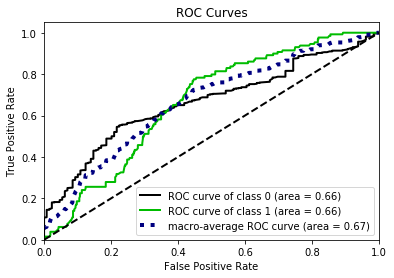

In [20]:
skplt.metrics.plot_roc(y_test, bnb.predict_proba(X_test),plot_micro=False)
plt.show()

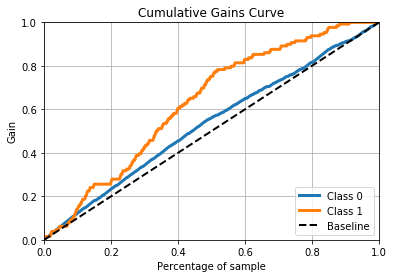

In [21]:
skplt.metrics.plot_cumulative_gain(y_test, bnb.predict_proba(X_test))
plt.show()

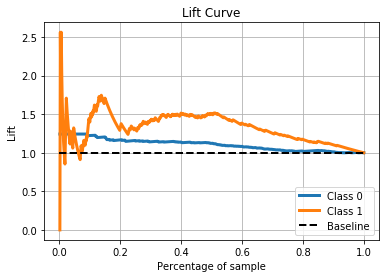

In [22]:
skplt.metrics.plot_lift_curve(y_test, bnb.predict_proba(X_test))
plt.show()

## Tune based on domain - change prior [0.1, 0.9] to [0.9, 0.1] with 0.1 increment

In [43]:
p1 = 0.1
p2 = 0.9

while p2 >= 0.1:
    bnb = BernoulliNB (alpha=1.0, class_prior=[p1, p2])
    bnb.fit(X_train, y_train)
    y_pred = bnb.predict(X_test)
    confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
    print(f'Confusion Matrix: class_prior=[{p1:.1f}, {p2:.1f}]')
    print(confmat)
    print()
    y_pred_p = bnb.predict_proba(X_test)
    print(f'Classification Report: class_prior=[{p1:.1f}, {p2:.1f}]')
    print(classification_report(y_test, y_pred))
    p1 += 0.1
    p2 -= 0.1
    print()

Confusion Matrix: class_prior=[0.1, 0.9]
         Predict[0]  Predict[1]
True[0]          32         500
True[1]           0         129

Classification Report: class_prior=[0.1, 0.9]
              precision    recall  f1-score   support

           0       1.00      0.06      0.11       532
           1       0.21      1.00      0.34       129

    accuracy                           0.24       661
   macro avg       0.60      0.53      0.23       661
weighted avg       0.84      0.24      0.16       661


Confusion Matrix: class_prior=[0.2, 0.8]
         Predict[0]  Predict[1]
True[0]         148         384
True[1]          11         118

Classification Report: class_prior=[0.2, 0.8]
              precision    recall  f1-score   support

           0       0.93      0.28      0.43       532
           1       0.24      0.91      0.37       129

    accuracy                           0.40       661
   macro avg       0.58      0.60      0.40       661
weighted avg       0.80      0.4

Parameter dependency of class_prior: 
* Class_prior [0.1, 0.9]: increases precision (positive prediction value); decreases recall (sensitivity); <b>decreases accuracy</b> because (False Positive + False Negative) / Total is high. Priors yield a high prediction for 1 (True) <b>False Positive</b>. 
* Class_prior [0.9, 0.1]: decreases precision (positive prediction value); increases recall (sensitivity); <b>increases accuracy</b> because (False Positive + False Negative) / Total is low. High prediction for 0 (False), <b>True Negative</b>; prior domain knowledge can help make model more accurate.

#### <b>For a more accurate model, class_prior should weigh more heavily on appropriate prior probabilities. In this case that is Predict[0] to improve 'True Negative' results (Predict[0] True[0]). This is an example where domain knowledge matters.</b>